In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models, datasets

## Autoencoder on CIFAR-10 

In [4]:
train, test = datasets.cifar10.load_data()

In [7]:
x_train, y_train = train
x_test, y_test = test

In [9]:
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

### introducing noise factor

In [10]:
noise_factor = 0.3
x_train_noisy = x_train + noise_factor * np.random.normal(loc = 0.0, scale=1.0, size=x_train.shape)

In [11]:
x_test_noisy = x_test + noise_factor * np.random.normal(loc = 0.0, scale=1.0, size=x_test.shape)

In [12]:
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

### autoencoder model building

In [21]:
input_img = layers.Input(shape = (32, 32, 3))
x = layers.Conv2D(32, (3, 3), activation='relu', padding = 'same')(input_img)
x = layers.MaxPooling2D((2,2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu', padding = 'same')(x)
x = layers.MaxPooling2D((2,2))(x)

encoded = x

x = layers.Conv2D(64, (3, 3), activation='relu', padding = 'same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='sigmoid', padding = 'same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(3, (3, 3), activation='sigmoid', padding = 'same')(x)
decoded = x

In [22]:
autoencoder = models.Model(inputs = input_img, outputs = decoded)
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_8 (UpSampling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 16, 16, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_9 (UpSampling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 32, 32, 3)      │           867 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 75,651 (295.51 KB)

 Trainable params: 75,651 (295.51 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
history = autoencoder.fit(x_train_noisy, x_train, epochs = 30, batch_size=128, shuffle = True, validation_data=(x_test_noisy, x_test))

Epoch 1/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 53ms/step - loss: 0.0180 - val_loss: 0.0107
Epoch 2/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 51ms/step - loss: 0.0095 - val_loss: 0.0088
Epoch 3/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 53ms/step - loss: 0.0086 - val_loss: 0.0083
Epoch 4/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 52ms/step - loss: 0.0082 - val_loss: 0.0080
Epoch 5/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 51ms/step - loss: 0.0079 - val_loss: 0.0078
Epoch 6/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 54ms/step - loss: 0.0077 - val_loss: 0.0077
Epoch 7/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 53ms/step - loss: 0.0075 - val_loss: 0.0074
Epoch 8/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 24s 61ms/step - loss: 0.0074 - val_loss: 0.0074
Epoch 9/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 54ms/step - loss: 0.0073 - val_loss: 0.0072
Epoch 10/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 22s 57ms/step - loss: 0.0072 - val_loss: 0.0071
Epoch 11/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 23s 58ms/step - loss: 0.0071 - val_loss: 0.0071
Epoch 12/30
391/391 ━━━━━━━━━━

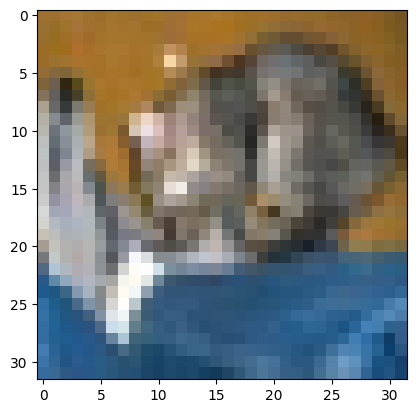

In [24]:
plt.imshow(x_test[0])

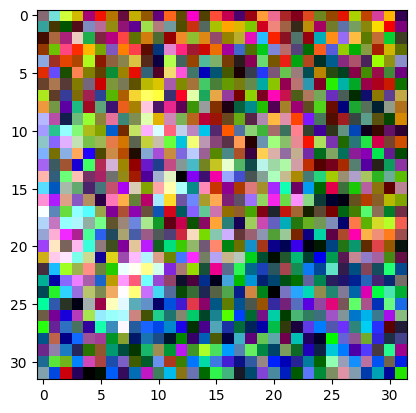

In [25]:
plt.imshow(x_test_noisy[0])

In [31]:
pred = autoencoder.predict(x_test_noisy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


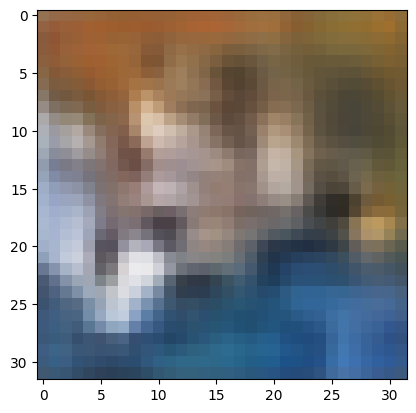

In [32]:
plt.imshow(pred[0])